# Домашняя работа 3
## Математическая оптимизация

В этом домашнем задании вам предстоит найти минимум функции используя метод `RMSProp`.

### Вам дана функция $y(x) = x^{3} \ln(x)$

1. Выпишите вид производной этой функции ($y'(x)$). (можно сделать это в виде latex кода, добавления картинки или записью кода python)

    $y'(x) = 3 \ x^{2} \ ln(x) + x^{2}$

2. Реализуйте функцию `dy(...)` в ячейке ниже, которая на вход принимает $x_0$, а на выходе возвращает значение производной функции $y(x)$ в точке $x_0$ (то есть $y'(x_0)$).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

def dy(x0):
    """
    Реализуйте функцию
    """
    return 3 * (x0 ** 2) * np.log(x0) + x0 ** 2

print(dy(1))

1.0


3. Реализуйте функцию `get_min_with_gd(...)`, которая принимает на вход начальную точку $x_0$, число шагов, lr и thershold; внутри себя производит поиск минимума при помощи градиентного спуска и возвращает последовательность точек, полученных на каждом шаге.

In [ ]:
def get_min_with_gd(x0, func_grad, n_iter=150, lr=0.01, threshold=0.001):
    """
    Реализуйте функцию
    """
    w = x0
    history = [w]

    for iter_number in tqdm(range(n_iter)):
        # Вычисляем градиент в текущей точке
        grad = func_grad(w)

        # Итерация градиентного спуска
        w = w - lr * grad / np.linalg.norm(grad)
        
        # Сохраняем новые аргументы в историяю
        history.append(w)

        # Критерий остановки -- вектор весов меняется не достаточно сильно
        if np.mean(abs(w - history[-2])) < threshold:
            break

    return np.array(history) 

In [ ]:
# Запустите поиск минимума с любой точки, например с точки 10

history = get_min_with_gd(10, dy)

  0%|          | 0/150 [00:00<?, ?it/s]

4. Проверьте, что все работает ожидаемым образом, запустив ячейку ниже

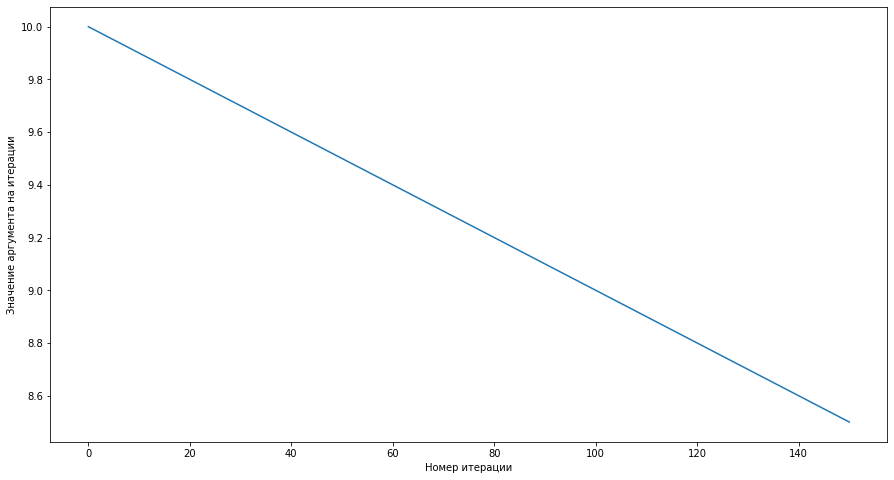

In [ ]:
plt.figure(figsize=(15, 8))

# Отрисуем то, как менялись координаты в процессе поиска минимума
plt.plot(history)

plt.xlabel('Номер итерации')
plt.ylabel('Значение аргумента на итерации')
plt.show()

In [ ]:
history

array([10.  ,  9.99,  9.98,  9.97,  9.96,  9.95,  9.94,  9.93,  9.92,
        9.91,  9.9 ,  9.89,  9.88,  9.87,  9.86,  9.85,  9.84,  9.83,
        9.82,  9.81,  9.8 ,  9.79,  9.78,  9.77,  9.76,  9.75,  9.74,
        9.73,  9.72,  9.71,  9.7 ,  9.69,  9.68,  9.67,  9.66,  9.65,
        9.64,  9.63,  9.62,  9.61,  9.6 ,  9.59,  9.58,  9.57,  9.56,
        9.55,  9.54,  9.53,  9.52,  9.51,  9.5 ,  9.49,  9.48,  9.47,
        9.46,  9.45,  9.44,  9.43,  9.42,  9.41,  9.4 ,  9.39,  9.38,
        9.37,  9.36,  9.35,  9.34,  9.33,  9.32,  9.31,  9.3 ,  9.29,
        9.28,  9.27,  9.26,  9.25,  9.24,  9.23,  9.22,  9.21,  9.2 ,
        9.19,  9.18,  9.17,  9.16,  9.15,  9.14,  9.13,  9.12,  9.11,
        9.1 ,  9.09,  9.08,  9.07,  9.06,  9.05,  9.04,  9.03,  9.02,
        9.01,  9.  ,  8.99,  8.98,  8.97,  8.96,  8.95,  8.94,  8.93,
        8.92,  8.91,  8.9 ,  8.89,  8.88,  8.87,  8.86,  8.85,  8.84,
        8.83,  8.82,  8.81,  8.8 ,  8.79,  8.78,  8.77,  8.76,  8.75,
        8.74,  8.73,

5. Реализовать поиск минимума при помощи алгоритма `RMSProp`. Реализуйте функцию `get_min_with_rmsprop(...)`, которая принимает на вход начальную точку $x_0$, число шагов, lr, $β$ и thershold; внутри себя производит поиск минимума при помощи градиентного спуска и возвращает последовательность точек, полученных на каждом шаге.

Напомним как выглядят формулы для этого алгоритма:

$$g^{n+1} = ∇f(w^{n})$$
$$\gamma^{n+1} = (1 - \beta) \gamma^{n} + \beta (g^{n+1}) ^ 2$$
$$w^{n+1} = w^n - \frac{\alpha}{\sqrt{\gamma^{n+1} + ɛ}}⋅g^{n+1}$$

Здесь $α$ -- learning rate, $ɛ$ -- малое число (можно взять 0.0001 -- оно нужно, чтобы случайно не было деления на 0), $\beta$ -- мера учета инерции

In [ ]:
def get_min_with_rmsprop(x0, f_gradient, alpha = 0.1, epsilon = 0.0001, beta = 0.1, n_iter = 170, threshold = 0.001):
  w = x0
  gamma = 0
  history = [w]

  for iter in tqdm(range(n_iter)):
    gr = f_gradient(w)

    gamma = (1 - beta) * gamma + beta * (gr ** 2)

    w = w - alpha * gr / (gamma ** 0.5 + epsilon) 

    history.append(w)

    if np.mean(abs(w - history[-2])) < threshold:
        break

  return np.array(history)

In [ ]:
# Запустите поиск минимума с нескольких точек, например с 0 и 2

history_rmsprop_1 = get_min_with_rmsprop(0.001, dy, alpha = 0.015, n_iter = 50)
history_rmsprop_2 = get_min_with_rmsprop(2, dy, n_iter = 40)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

6. Нарисовать график, на котором отображен реальный минимум функции и все точки, которые были получены на каждом шаге RMSProp алгоритма.

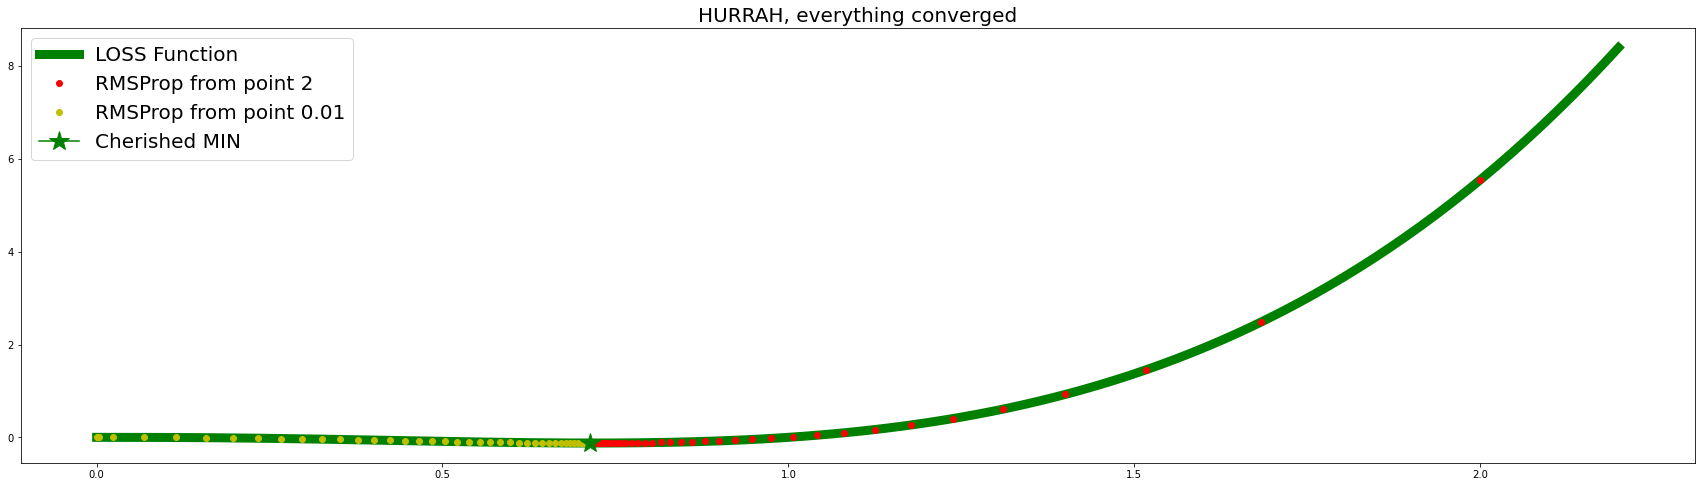

In [ ]:
# Ваш код тут

def func(x):
  return x ** 3 * np.log(x)

fig = plt.figure(figsize=(30,8))

ax = fig.add_subplot()

plt.title('HURRAH, everything converged', size= 20)

x = np.linspace(0.0001, 2.2, 300)

minY = min(func(x))

minX = x[np.where(func(x) == minY)]

ax.plot(x, func(x), 'g-', linewidth = '9', label = 'LOSS Function')
ax.plot(history_rmsprop_2, func(history_rmsprop_2), 'ro', label = 'RMSProp from point 2')
ax.plot(history_rmsprop_1, func(history_rmsprop_1), 'yo', label = 'RMSProp from point 0.001')
ax.plot(minX, minY, marker = '*', ms = 20, color = 'green', label = 'Cherished MIN')

ax.legend(prop={'size': 20})
fig.show()

In [ ]:
history_rmsprop_1

array([0.01      , 0.13682044, 0.29438501, 0.44192647, 0.56352863,
       0.65016687, 0.6971314 , 0.71312157, 0.71618593, 0.71651521])

In [ ]:
history_rmsprop_2

array([2.        , 1.68378035, 1.51679205, 1.40024146, 1.31054564,
       1.23790289, 1.17718775, 1.12534679, 1.08039986, 1.04098353,
       1.00611615, 0.975066  , 0.94727231, 0.92229536, 0.89978366,
       0.87945151, 0.86106326, 0.84442192, 0.8293608 , 0.81573718,
       0.80342745, 0.79232335, 0.782329  , 0.77335847, 0.76533389,
       0.75818387, 0.75184222, 0.74624692, 0.74133932, 0.73706345,
       0.73336557, 0.73019385, 0.72749813, 0.72522993, 0.72334243,
       0.72179065, 0.72053168, 0.71952493, 0.71873246])